# Import Needed Libraraies:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

# Loading And Discovering The Data 

In [2]:
dirty_data=pd.read_csv(r"C:\Users\HP\Downloads\car_sale_data_dirty.csv")

In [3]:
dirty_data.head()

,Date,Salesperson,Customer Name,Customer Age,Customer Gender,Car Make,Car Model,Car Year,Quantity,Sale Price,...,Discount,Payment Method,Commission Rate,Commission Earned,Sales Region,Sale Year,Sale Month,Sale Quarter,Day of Week,Season
0,2022-08-24,Matthew Gross,Joshua Lin,NaN,Male,Ford,NaN,2024.0,2.0,70866.60,...,0.05,Cash,0.05,3543.33,Alaska,2021.0,August,3.0,Wednesday,Summer
1,2024-06-11,Ralph Dunn,Michael Thomas,49.0,Male,Toyota,Prius,NaN,3.0,72814.56,...,0.10,Loan,0.09,6553.31,Kansas,2022.0,June,2.0,Tuesday,Summer
2,2022-09-14,Chris Johnson,Jordan Cooper,NaN,Female,Chevrolet,Silverado,2021.0,2.0,80155.68,...,0.08,Lease,0.06,4809.34,Mississippi,2022.0,September,3.0,Wednesday,Fall
3,2018-11-16,Thomas Morrow,Cory Miles,47.0,Male,Mercedes,C-Class,2020.0,2.0,153280.16,...,0.06,Loan,0.04,6131.21,Alabama,2022.0,November,4.0,Friday,Fall
4,2018-02-09,Donald Allen,Sara Graham,57.0,Male,Toyota,Camry,2022.0,1.0,32726.00,...,0.10,Loan,0.05,1636.30,Texas,2019.0,NaN,1.0,Friday,Winter


In [4]:
dirty_data.shape

(1001668, 22)

In [5]:
dirty_data.columns

Index(['Date', 'Salesperson', 'Customer Name', 'Customer Age',
       'Customer Gender', 'Car Make', 'Car Model', 'Car Year', 'Quantity',
       'Sale Price', 'Cost', 'Profit', 'Discount', 'Payment Method',
       'Commission Rate', 'Commission Earned', 'Sales Region', 'Sale Year',
       'Sale Month', 'Sale Quarter', 'Day of Week', 'Season'],
      dtype='object')

In [6]:
dirty_data.describe(include='object').T

,count,unique,top,freq
Date,951586,2557,2019-04-27,442
Salesperson,943211,100,Jill Jones,19080
Customer Name,944509,319658,Michael Smith,465
Customer Gender,932408,2,Male,466448
Car Make,946872,51,Toyota,88287
Car Model,950427,50,S-Class,19304
Payment Method,938736,3,Cash,313548
Sales Region,932667,50,Rhode Island,18911
Sale Month,932655,12,January,79681
Day of Week,933547,7,Monday,134102


In [7]:
dirty_data.describe()

,Customer Age,Car Year,Quantity,Sale Price,Cost,Profit,Discount,Commission Rate,Commission Earned,Sale Year,Sale Quarter
count,950526.000000,941140.000000,938701.000000,9.360870e+05,9.330050e+05,9.473510e+05,932809.000000,950954.000000,951426.000000,945034.000000,932086.000000
mean,45.021855,2020.998368,2.120784,8.658692e+04,7.268678e+04,1.390566e+04,0.059981,0.071191,5608.041618,2022.020726,2.508403
std,14.731936,1.999677,0.608236,1.697650e+05,3.622137e+05,2.143001e+05,0.037555,0.017442,3577.643364,1.773757,1.118011
min,20.000000,2018.000000,1.000000,9.508000e+03,6.969890e+03,-1.499900e+07,0.000000,0.030000,0.000000,2018.000000,1.000000
25%,32.000000,2019.000000,2.000000,5.495804e+04,4.365259e+04,8.205460e+03,0.030000,0.060000,3286.320000,2021.000000,2.000000
50%,45.000000,2021.000000,2.000000,7.391220e+04,5.933978e+04,1.566082e+04,0.060000,0.070000,4988.170000,2022.000000,3.000000
75%,58.000000,2023.000000,3.000000,1.072860e+05,8.300778e+04,2.578047e+04,0.090000,0.080000,7413.440000,2024.000000,4.000000
max,70.000000,2024.000000,3.000000,2.821159e+07,3.600332e+07,9.047493e+04,0.150000,0.120000,34384.900000,2024.000000,4.000000


In [8]:
dirty_data.isna().sum()

Date                 50082
Salesperson          58457
Customer Name        57159
Customer Age         51142
Customer Gender      69260
Car Make             54796
Car Model            51241
Car Year             60528
Quantity             62967
Sale Price           65581
Cost                 68663
Profit               54317
Discount             68859
Payment Method       62932
Commission Rate      50714
Commission Earned    50242
Sales Region         69001
Sale Year            56634
Sale Month           69013
Sale Quarter         69582
Day of Week          68121
Season               62114
dtype: int64

In [9]:
dirty_data.duplicated().sum()

np.int64(1000)

# Data Cleaning & Preprosessing

## Handling Null & Missing  Values 

In [10]:
print("Data Before Handling Missing Values")
dirty_data.isnull().sum()

Data Before Handling Missing Values


Date                 50082
Salesperson          58457
Customer Name        57159
Customer Age         51142
Customer Gender      69260
Car Make             54796
Car Model            51241
Car Year             60528
Quantity             62967
Sale Price           65581
Cost                 68663
Profit               54317
Discount             68859
Payment Method       62932
Commission Rate      50714
Commission Earned    50242
Sales Region         69001
Sale Year            56634
Sale Month           69013
Sale Quarter         69582
Day of Week          68121
Season               62114
dtype: int64

In [11]:
print("Data After Handling Missing Values")
dirty_data.fillna(dirty_data.median(numeric_only=True),inplace=True) ## replacing numeric null values with median
for i in dirty_data.select_dtypes('object'):
    dirty_data[i]=dirty_data[i].fillna(dirty_data[i].mode()[0])
dirty_data.isna().sum()

Data After Handling Missing Values


Date                 0
Salesperson          0
Customer Name        0
Customer Age         0
Customer Gender      0
Car Make             0
Car Model            0
Car Year             0
Quantity             0
Sale Price           0
Cost                 0
Profit               0
Discount             0
Payment Method       0
Commission Rate      0
Commission Earned    0
Sales Region         0
Sale Year            0
Sale Month           0
Sale Quarter         0
Day of Week          0
Season               0
dtype: int64

## Handling Duplicated Values 

In [12]:
print("Data Before Handling Dupliacted Values")
dirty_data.duplicated().sum()

Data Before Handling Dupliacted Values


np.int64(1000)

In [13]:
print("Data After Handling Dupliacted Values")
dirty_data.drop_duplicates(inplace=True)
dirty_data.duplicated().sum()

Data After Handling Dupliacted Values


np.int64(0)

## Handling Format Issues 

In [14]:
dirty_data.columns

Index(['Date', 'Salesperson', 'Customer Name', 'Customer Age',
       'Customer Gender', 'Car Make', 'Car Model', 'Car Year', 'Quantity',
       'Sale Price', 'Cost', 'Profit', 'Discount', 'Payment Method',
       'Commission Rate', 'Commission Earned', 'Sales Region', 'Sale Year',
       'Sale Month', 'Sale Quarter', 'Day of Week', 'Season'],
      dtype='object')

In [15]:
## detect all features :
print("Car Make Feature Before Handling Format Issues")
dirty_data['Car Make'].unique()

Car Make Feature Before Handling Format Issues


array(['Ford', 'Toyota', 'Chevrolet', 'Mercedes', 'BMW', 'Kia', 'Audi',
       'audi', 'CHEVROLET', 'Nissan', 'Honda', 'Hyundai', 'nissan', 'Bmw',
       ' kia ', ' nan ', 'AUDI', ' Mercedes ', 'honda', ' Ford ', 'HONDA',
       ' Hyundai ', ' Chevrolet ', 'KIA', 'chevrolet', ' nissan ',
       ' Toyota ', ' honda ', 'MERCEDES', ' toyota ', ' Audi ', ' Kia ',
       'TOYOTA', 'ford', 'toyota', ' bmw ', ' Nissan ', 'HYUNDAI',
       ' audi ', ' chevrolet ', ' ford ', ' BMW ', 'mercedes',
       ' mercedes ', 'hyundai', ' Honda ', 'NISSAN', 'FORD', 'bmw', 'kia',
       ' hyundai '], dtype=object)

In [16]:
print("Car Make Feature After Handling Format Issues")
dirty_data['Car Make'] = (
    dirty_data['Car Make']
    .astype(str)                
    .str.strip()
    .str.lower()
    .str.title()
)
dirty_data['Car Make'] = dirty_data['Car Make'].replace("Nan", np.nan)
dirty_data['Car Make'].unique()

Car Make Feature After Handling Format Issues


array(['Ford', 'Toyota', 'Chevrolet', 'Mercedes', 'Bmw', 'Kia', 'Audi',
       'Nissan', 'Honda', 'Hyundai', nan], dtype=object)

In [17]:
print(" Car Make Before Removing Nans ")
dirty_data['Car Make'].isna().sum()

 Car Make Before Removing Nans 


np.int64(13532)

In [18]:
## fillling nan values
print(" Car Make Before Removing Nans ")
dirty_data['Car Make']=dirty_data['Car Make'].fillna(dirty_data['Car Make'].mode()[0])
dirty_data['Car Make'].isna().sum()

 Car Make Before Removing Nans 


np.int64(0)

# Feature Reductions 

In [19]:
print("features before removing unwanted one")
dirty_data.columns

features before removing unwanted one


Index(['Date', 'Salesperson', 'Customer Name', 'Customer Age',
       'Customer Gender', 'Car Make', 'Car Model', 'Car Year', 'Quantity',
       'Sale Price', 'Cost', 'Profit', 'Discount', 'Payment Method',
       'Commission Rate', 'Commission Earned', 'Sales Region', 'Sale Year',
       'Sale Month', 'Sale Quarter', 'Day of Week', 'Season'],
      dtype='object')

In [20]:
print("features after removing unwanted one")
dirty_data.drop(columns=['Salesperson','Customer Name','Commission Earned','Commission Rate'],inplace=True)
dirty_data.columns

features after removing unwanted one


Index(['Date', 'Customer Age', 'Customer Gender', 'Car Make', 'Car Model',
       'Car Year', 'Quantity', 'Sale Price', 'Cost', 'Profit', 'Discount',
       'Payment Method', 'Sales Region', 'Sale Year', 'Sale Month',
       'Sale Quarter', 'Day of Week', 'Season'],
      dtype='object')

# Handling Data Types Errors

In [21]:
print("Featres Before Handling Data Types")
dirty_data.dtypes

Featres Before Handling Data Types


Date                object
Customer Age       float64
Customer Gender     object
Car Make            object
Car Model           object
Car Year           float64
Quantity           float64
Sale Price         float64
Cost               float64
Profit             float64
Discount           float64
Payment Method      object
Sales Region        object
Sale Year          float64
Sale Month          object
Sale Quarter       float64
Day of Week         object
Season              object
dtype: object

In [22]:
dirty_data.head(1)

,Date,Customer Age,Customer Gender,Car Make,Car Model,Car Year,Quantity,Sale Price,Cost,Profit,Discount,Payment Method,Sales Region,Sale Year,Sale Month,Sale Quarter,Day of Week,Season
0,2022-08-24,45.0,Male,Ford,S-Class,2024.0,2.0,70866.6,69960.74,905.86,0.05,Cash,Alaska,2021.0,August,3.0,Wednesday,Summer


In [23]:
print("Featres Before Handling Data Types")
dirty_data['Customer Age']=dirty_data['Customer Age'].astype(int)
dirty_data['Car Year']=dirty_data['Car Year'].astype(int)
dirty_data['Quantity']=dirty_data['Quantity'].astype(int)
dirty_data['Sale Quarter']=dirty_data['Sale Quarter'].astype(int)
dirty_data['Sale Year']=dirty_data['Sale Year'].astype(int)
dirty_data['Date']=pd.to_datetime(dirty_data['Date'],errors='coerce')
dirty_data.dtypes

Featres Before Handling Data Types


Date               datetime64[ns]
Customer Age                int64
Customer Gender            object
Car Make                   object
Car Model                  object
Car Year                    int64
Quantity                    int64
Sale Price                float64
Cost                      float64
Profit                    float64
Discount                  float64
Payment Method             object
Sales Region               object
Sale Year                   int64
Sale Month                 object
Sale Quarter                int64
Day of Week                object
Season                     object
dtype: object

# Handling Outliers

Box Plotting Outliers 


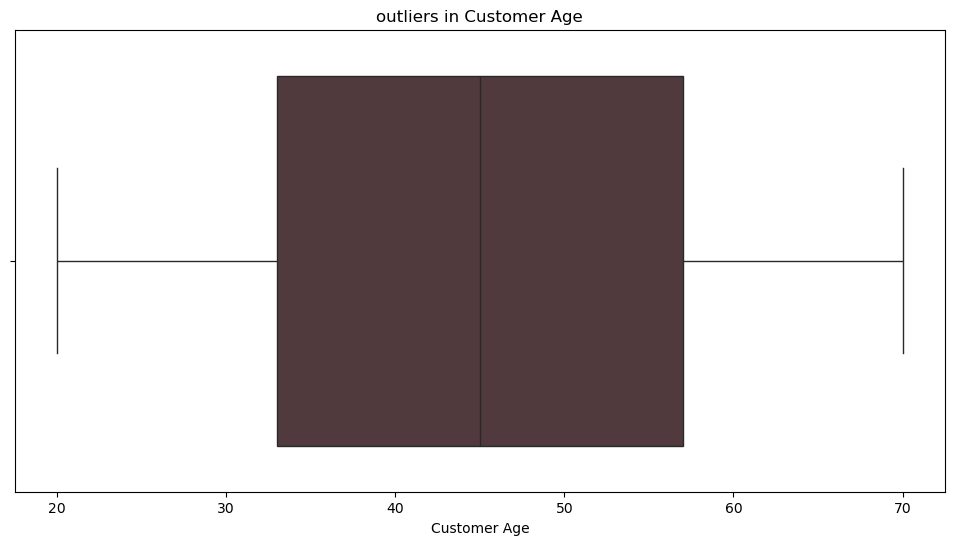

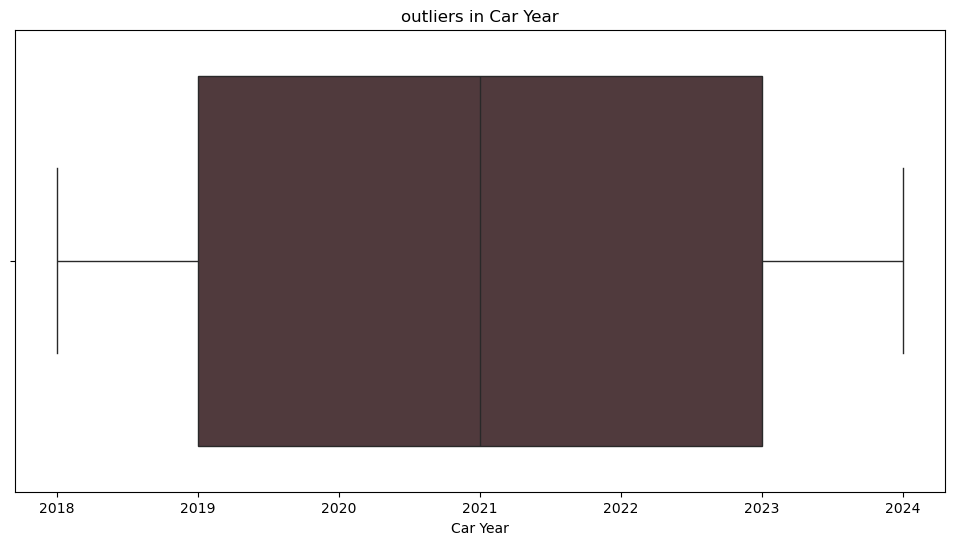

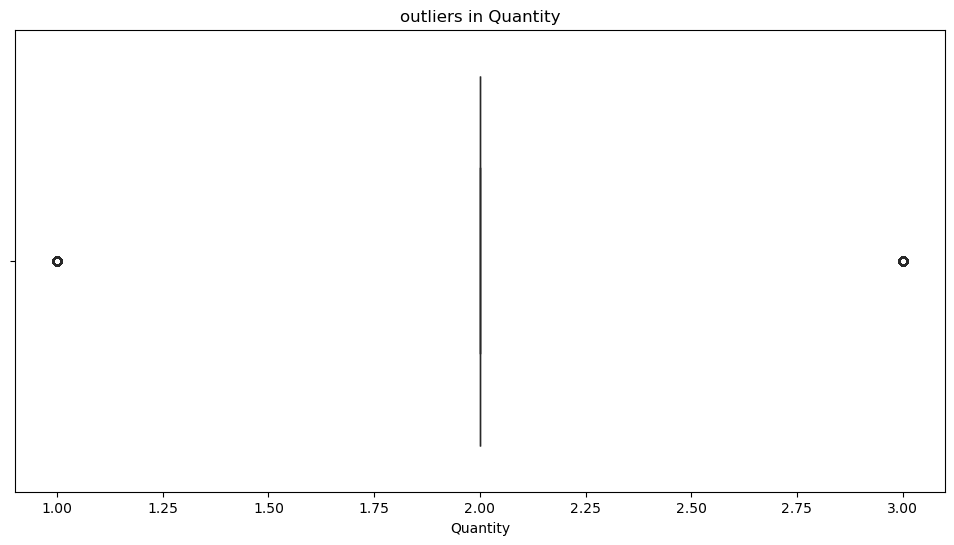

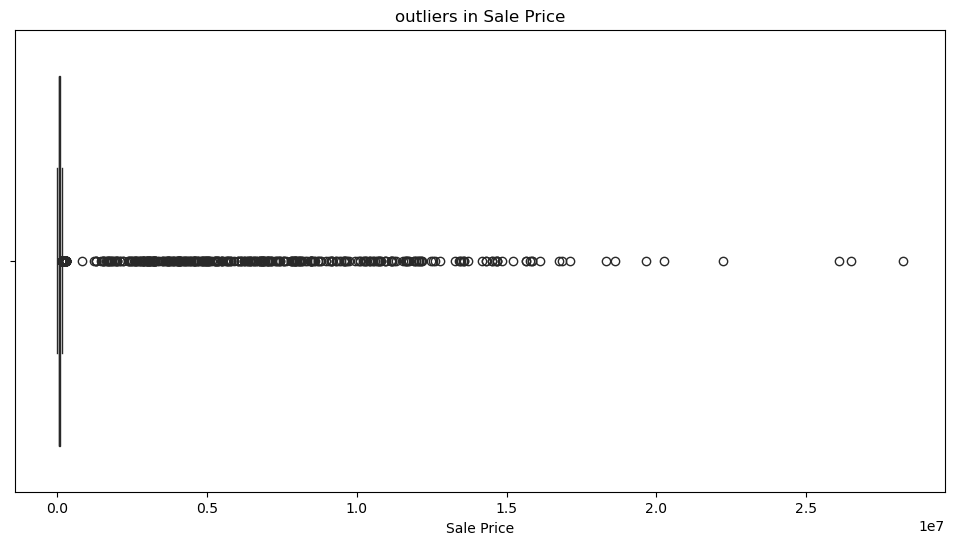

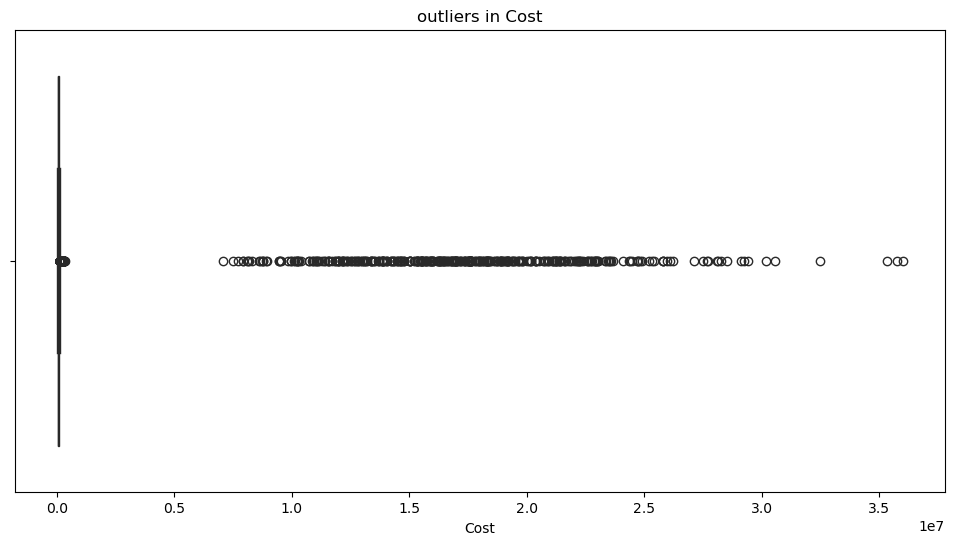

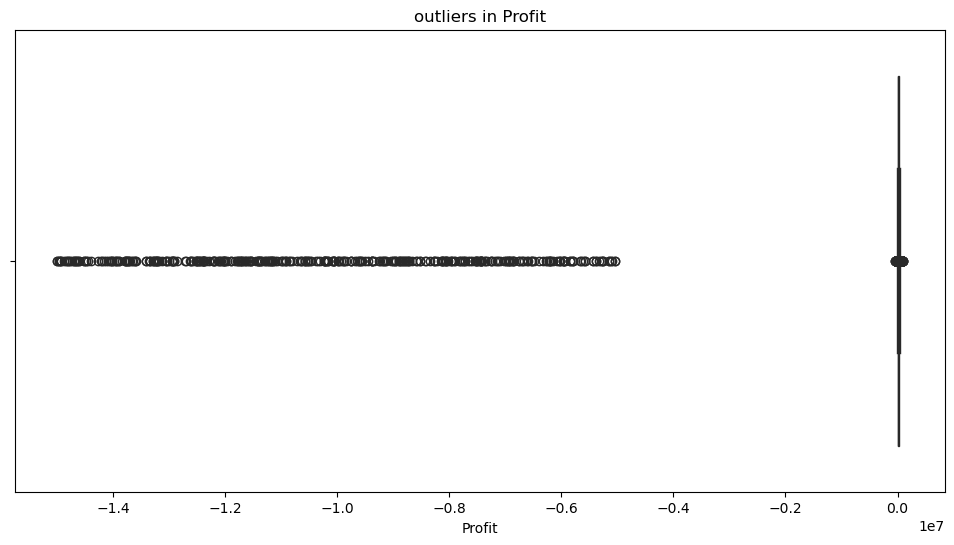

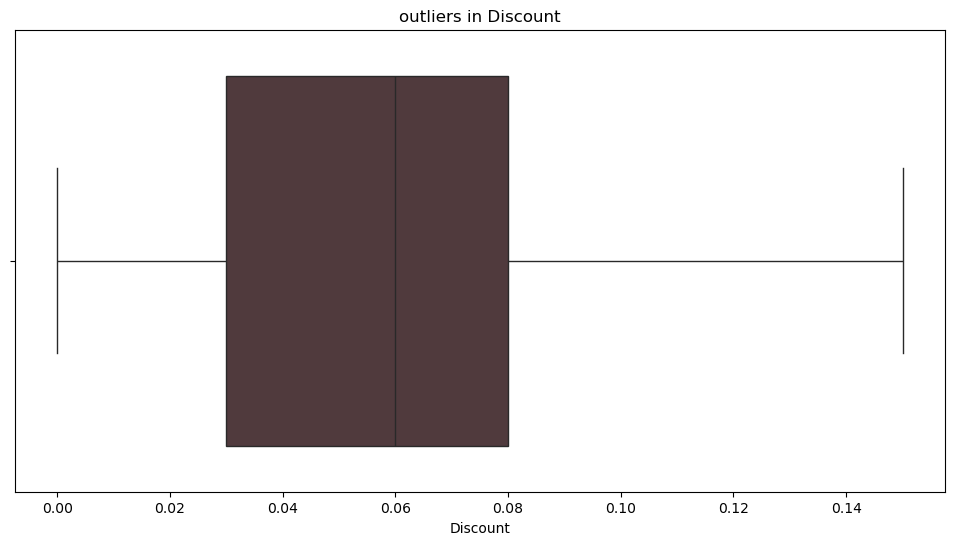

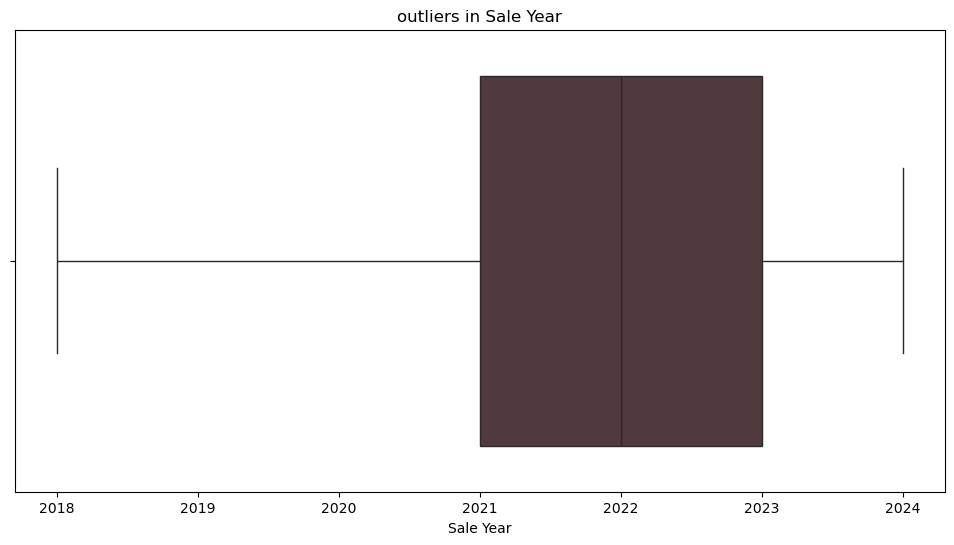

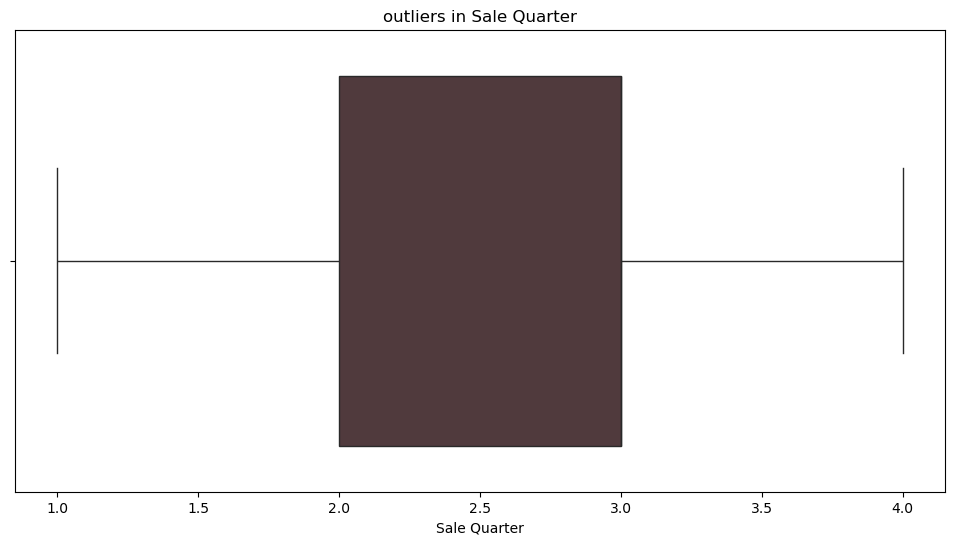

In [24]:
print("Box Plotting Outliers ")
for i in dirty_data.select_dtypes(include='number'):
    plt.figure(figsize=(12,6))
    sns.boxplot(x=dirty_data[i],color='#54363b')
    plt.title(f"outliers in {i}")
    plt.show()

In [25]:
dirty_data.select_dtypes('number')

,Customer Age,Car Year,Quantity,Sale Price,Cost,Profit,Discount,Sale Year,Sale Quarter
0,45,2024,2,70866.60,69960.74,905.86,0.05,2021,3
1,49,2021,3,72814.56,60478.29,15660.82,0.10,2022,2
2,45,2021,2,80155.68,56108.98,24046.70,0.08,2022,3
3,47,2020,2,153280.16,107296.11,45984.05,0.06,2022,4
4,57,2022,1,32726.00,26355.91,6370.09,0.10,2019,1
...,...,...,...,...,...,...,...,...,...
1001663,59,2022,2,43990.12,40953.70,3036.42,0.08,2021,1
1001664,56,2024,2,124801.92,87361.34,37440.58,0.12,2023,1
1001665,45,2020,3,56895.93,40171.67,16724.26,0.06,2022,3
1001666,58,2020,2,122440.64,133611.11,-11170.47,0.08,2024,3


In [26]:
dirty_data['Customer Age'].describe()# data seems normal

count    1.000668e+06
mean     4.502097e+01
std      1.435078e+01
min      2.000000e+01
25%      3.300000e+01
50%      4.500000e+01
75%      5.700000e+01
max      7.000000e+01
Name: Customer Age, dtype: float64

In [27]:
dirty_data['Sale Price'].describe()# not normal distributed 

count    1.000668e+06
mean     8.575134e+04
std      1.641186e+05
min      9.508000e+03
25%      5.614808e+04
50%      7.391220e+04
75%      1.041932e+05
max      2.821159e+07
Name: Sale Price, dtype: float64

In [28]:
dirty_data['Profit'].describe()# not normal distributed

count    1.000668e+06
mean     1.402358e+04
std      2.076479e+05
min     -1.499900e+07
25%      8.766718e+03
50%      1.566082e+04
75%      2.486058e+04
max      9.047493e+04
Name: Profit, dtype: float64

In [29]:
dirty_data['Cost'].describe() # not normal distributed

count    1.000668e+06
mean     7.174352e+04
std      3.489045e+05
min      6.969890e+03
25%      4.472431e+04
50%      5.933978e+04
75%      8.087240e+04
max      3.600332e+07
Name: Cost, dtype: float64

In [30]:
dirty_data.head(1)

,Date,Customer Age,Customer Gender,Car Make,Car Model,Car Year,Quantity,Sale Price,Cost,Profit,Discount,Payment Method,Sales Region,Sale Year,Sale Month,Sale Quarter,Day of Week,Season
0,2022-08-24,45,Male,Ford,S-Class,2024,2,70866.6,69960.74,905.86,0.05,Cash,Alaska,2021,August,3,Wednesday,Summer


Features After Handling Outlier


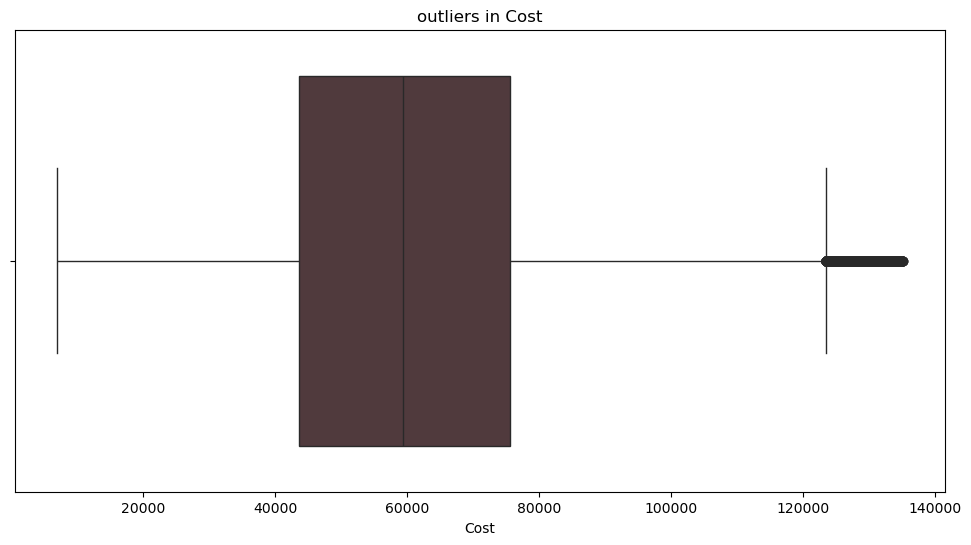

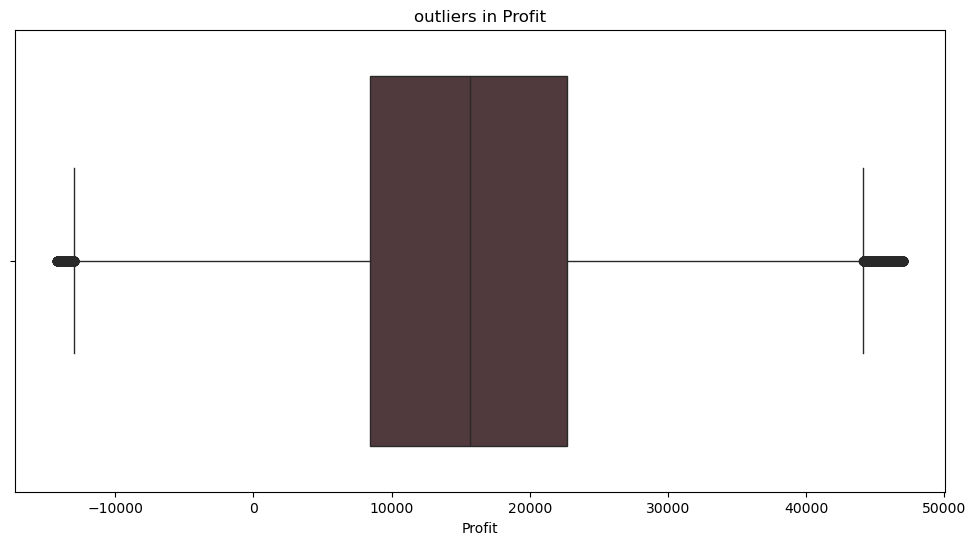

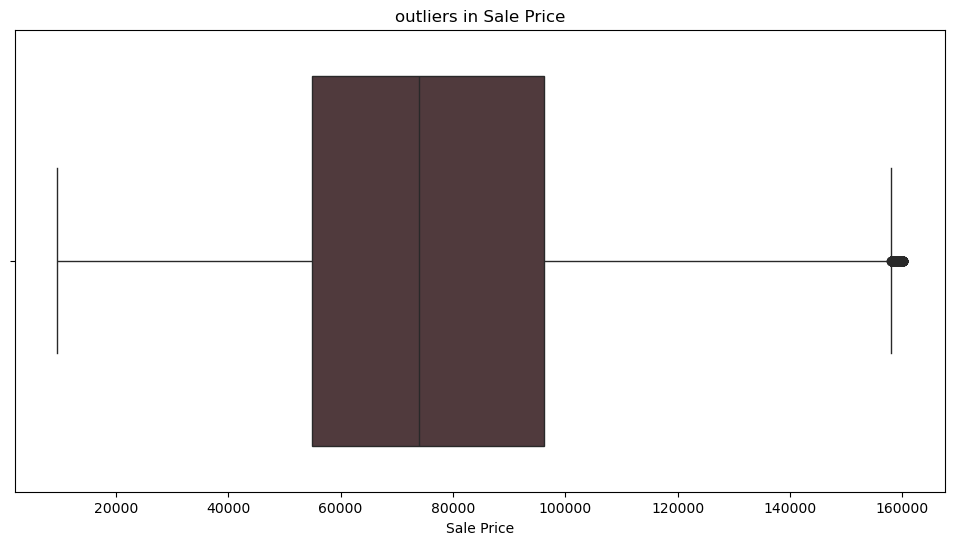

In [31]:
print("Features After Handling Outlier")
for i in ['Cost','Profit','Sale Price']:
    Q1=dirty_data[i].quantile(.25)
    Q3=dirty_data[i].quantile(.75)
    IQR=Q3-Q1
    lower=Q1-IQR*1.5
    upper=Q3+IQR*1.5
    dirty_data=dirty_data[(dirty_data[i]>=lower)&(dirty_data[i]<=upper)]
for i in ['Cost','Profit','Sale Price']:
    plt.figure(figsize=(12,6))
    sns.boxplot(x=dirty_data[i],color='#54363b')
    plt.title(f"outliers in {i}")
    plt.show()

# Saving The Cleaned Data

In [32]:
dirty_data.to_csv("final_project_clean_data.csv",index=False)

In [33]:
df=pd.read_csv(r"C:\Users\HP\Downloads\final_project_clean_data.xls")

In [34]:
df.head()

,Date,Customer Age,Customer Gender,Car Make,Car Model,Car Year,Quantity,Sale Price,Cost,Profit,Discount,Payment Method,Sales Region,Sale Year,Sale Month,Sale Quarter,Day of Week,Season
0,2022-08-24,45,Male,Ford,S-Class,2024,2,70866.60,69960.74,905.86,0.05,Cash,Alaska,2021,August,3,Wednesday,Summer
1,2024-06-11,49,Male,Toyota,Prius,2021,3,72814.56,60478.29,15660.82,0.10,Loan,Kansas,2022,June,2,Tuesday,Summer
2,2022-09-14,45,Female,Chevrolet,Silverado,2021,2,80155.68,56108.98,24046.70,0.08,Lease,Mississippi,2022,September,3,Wednesday,Fall
3,2018-11-16,47,Male,Mercedes,C-Class,2020,2,153280.16,107296.11,45984.05,0.06,Loan,Alabama,2022,November,4,Friday,Fall
4,2018-02-09,57,Male,Toyota,Camry,2022,1,32726.00,26355.91,6370.09,0.10,Loan,Texas,2019,January,1,Friday,Winter


# Expoloratory Data Analysis 

In [35]:
df.dtypes

Date                object
Customer Age         int64
Customer Gender     object
Car Make            object
Car Model           object
Car Year             int64
Quantity             int64
Sale Price         float64
Cost               float64
Profit             float64
Discount           float64
Payment Method      object
Sales Region        object
Sale Year            int64
Sale Month          object
Sale Quarter         int64
Day of Week         object
Season              object
dtype: object

In [36]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [37]:
df['Date'].dtype

dtype('<M8[ns]')

In [38]:
df.columns

Index(['Date', 'Customer Age', 'Customer Gender', 'Car Make', 'Car Model',
       'Car Year', 'Quantity', 'Sale Price', 'Cost', 'Profit', 'Discount',
       'Payment Method', 'Sales Region', 'Sale Year', 'Sale Month',
       'Sale Quarter', 'Day of Week', 'Season'],
      dtype='object')

In [39]:
df.describe(include='object').T

,count,unique,top,freq
Customer Gender,934425,2,Male,499717
Car Make,934425,10,Toyota,157232
Car Model,934425,50,S-Class,61708
Payment Method,934425,3,Cash,351234
Sales Region,934425,50,Rhode Island,81924
Sale Month,934425,12,January,138745
Day of Week,934425,7,Monday,188668
Season,934425,4,Spring,278583


In [40]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,934425,2021-05-23 02:24:13.823259648,2018-01-01 00:00:00,2019-06-22 00:00:00,2021-04-26 00:00:00,2023-02-28 00:00:00,2024-12-31 00:00:00,NaN
Customer Age,934425.0,45.022392,20.0,33.0,45.0,57.0,70.0,14.351615
Car Year,934425.0,2020.997204,2018.0,2019.0,2021.0,2023.0,2024.0,1.938329
Quantity,934425.0,2.065907,1.0,2.0,2.0,2.0,3.0,0.57093
Sale Price,934425.0,76646.329261,9508.0,54944.0,73876.0,96197.72,160057.56,31123.609886
Cost,934425.0,60442.846029,6969.89,43690.73,59339.78,75583.14,135090.63,23265.61054
Profit,934425.0,16293.601331,-14205.48,8436.48,15660.82,22720.26,46974.91,11534.574466
Discount,934425.0,0.059881,0.0,0.03,0.06,0.08,0.15,0.036172
Sale Year,934425.0,2021.962669,2018.0,2021.0,2022.0,2023.0,2024.0,1.742602
Sale Quarter,934425.0,2.54227,1.0,2.0,3.0,3.0,4.0,1.085656


##  Univariate Analysis 

### Show The Distribution of The Categorical Data 

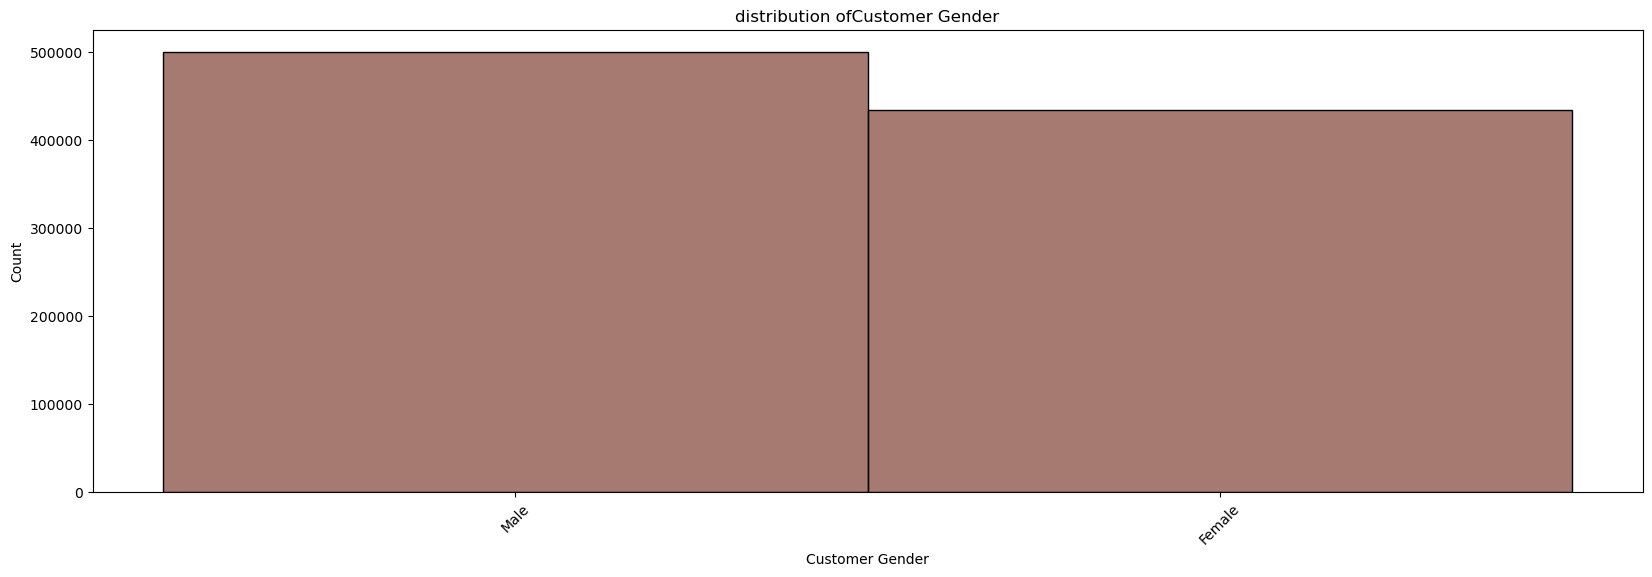

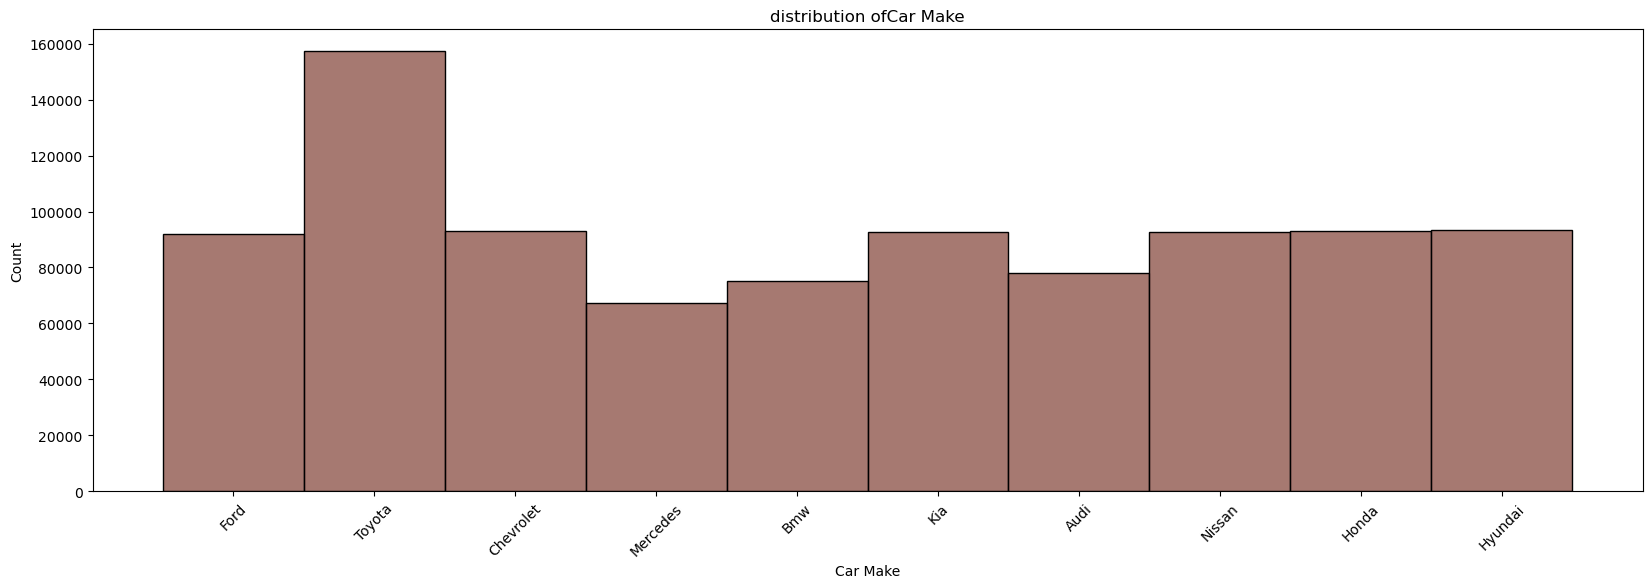

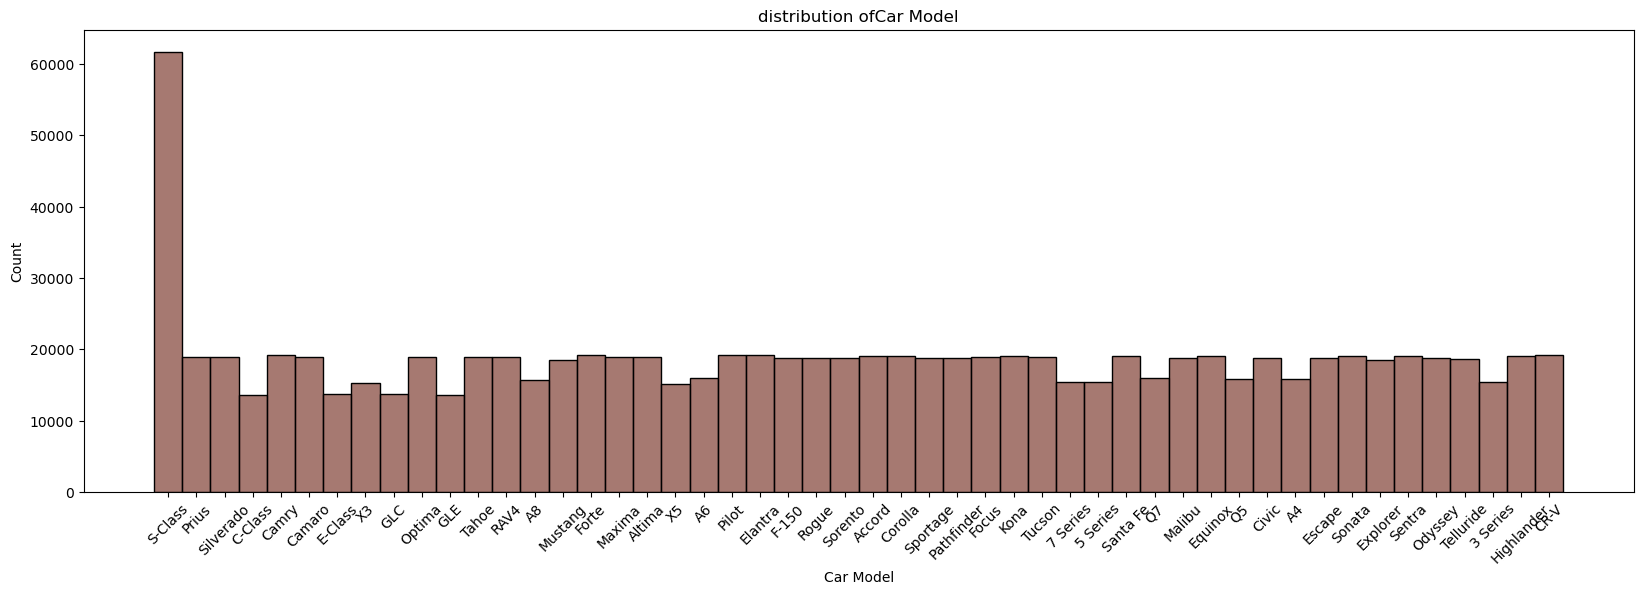

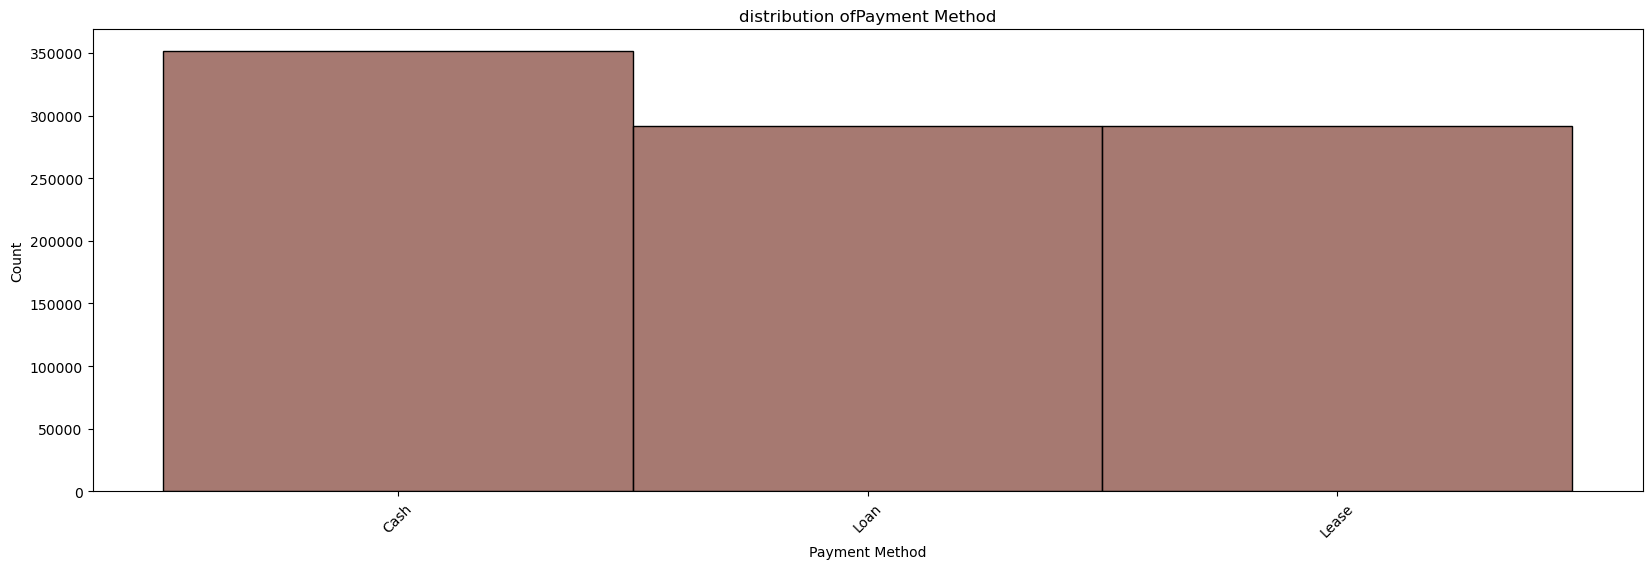

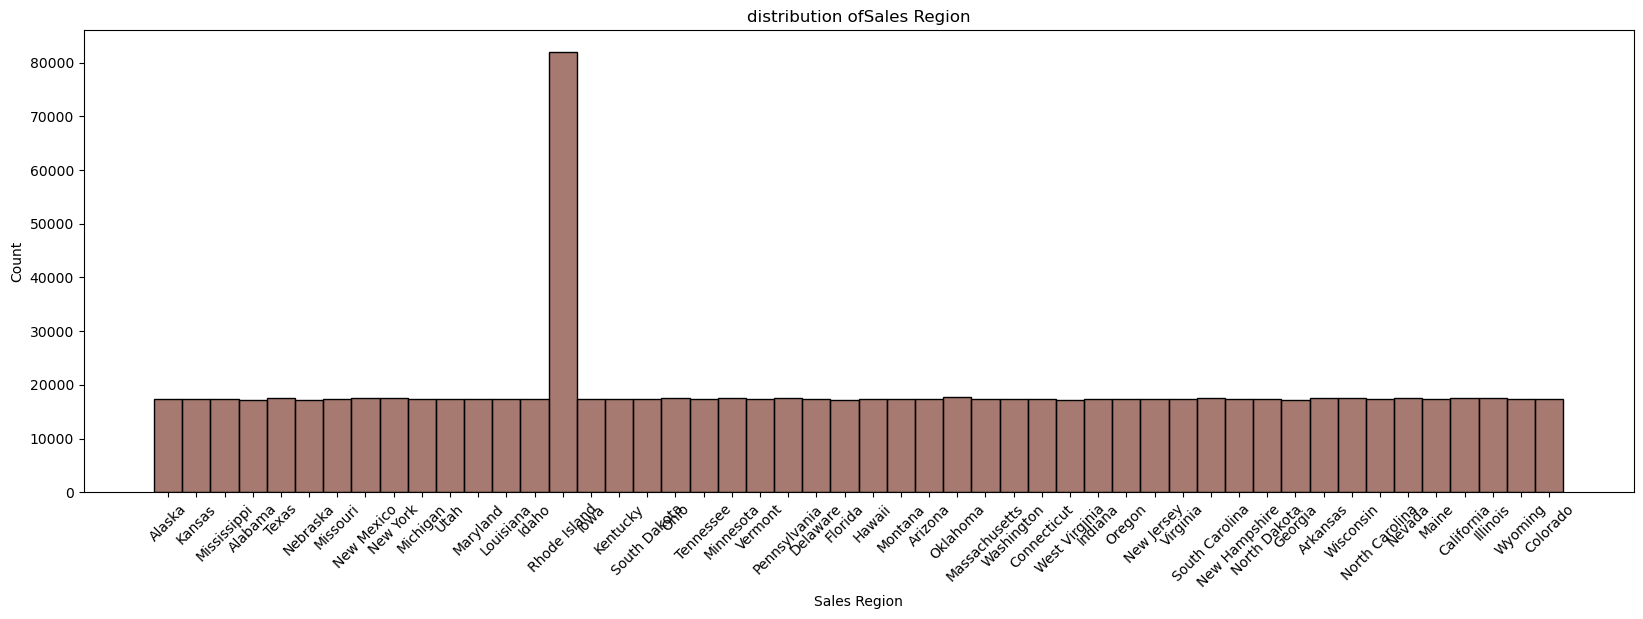

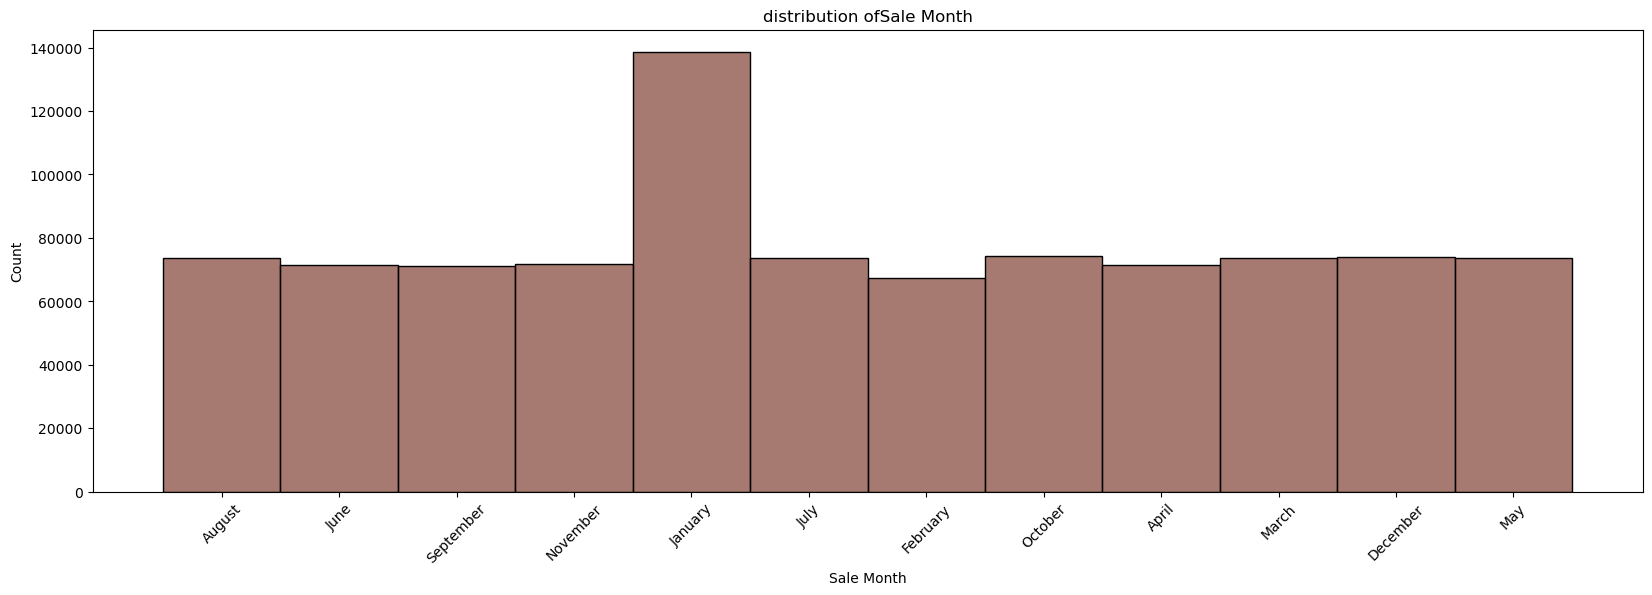

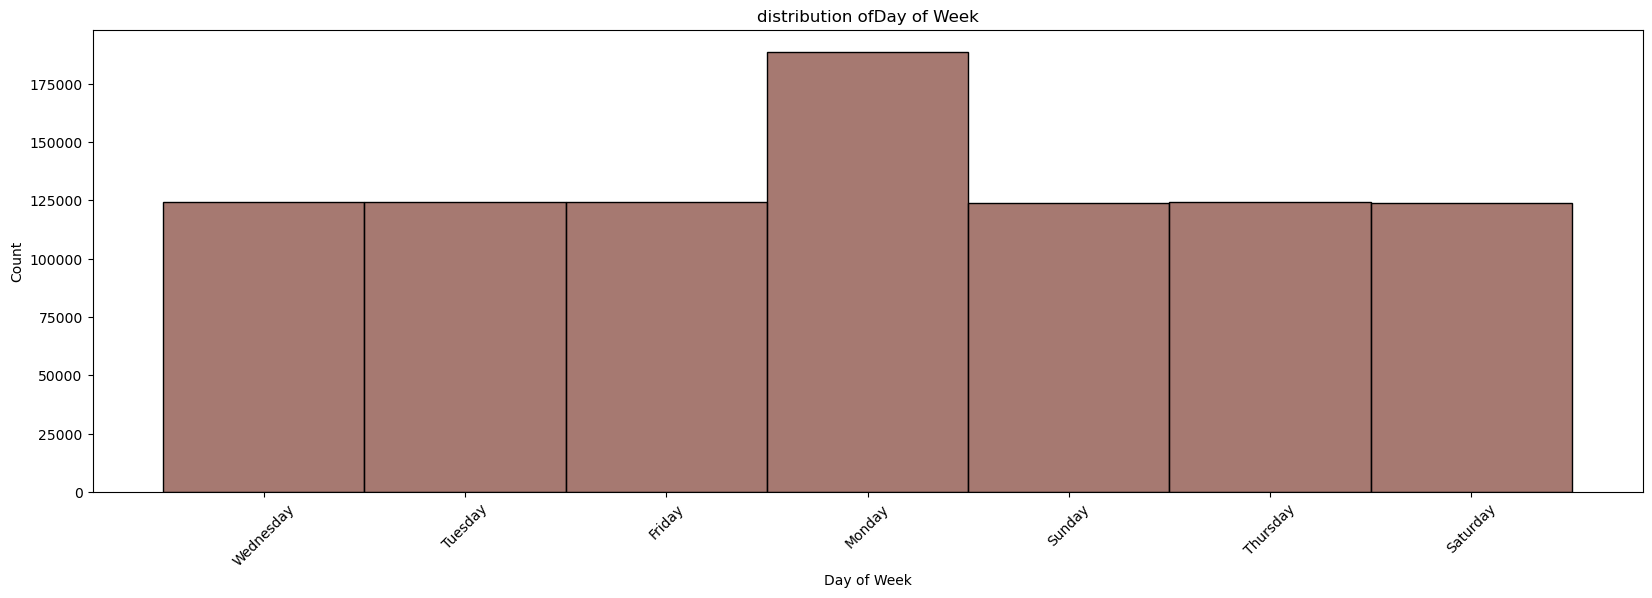

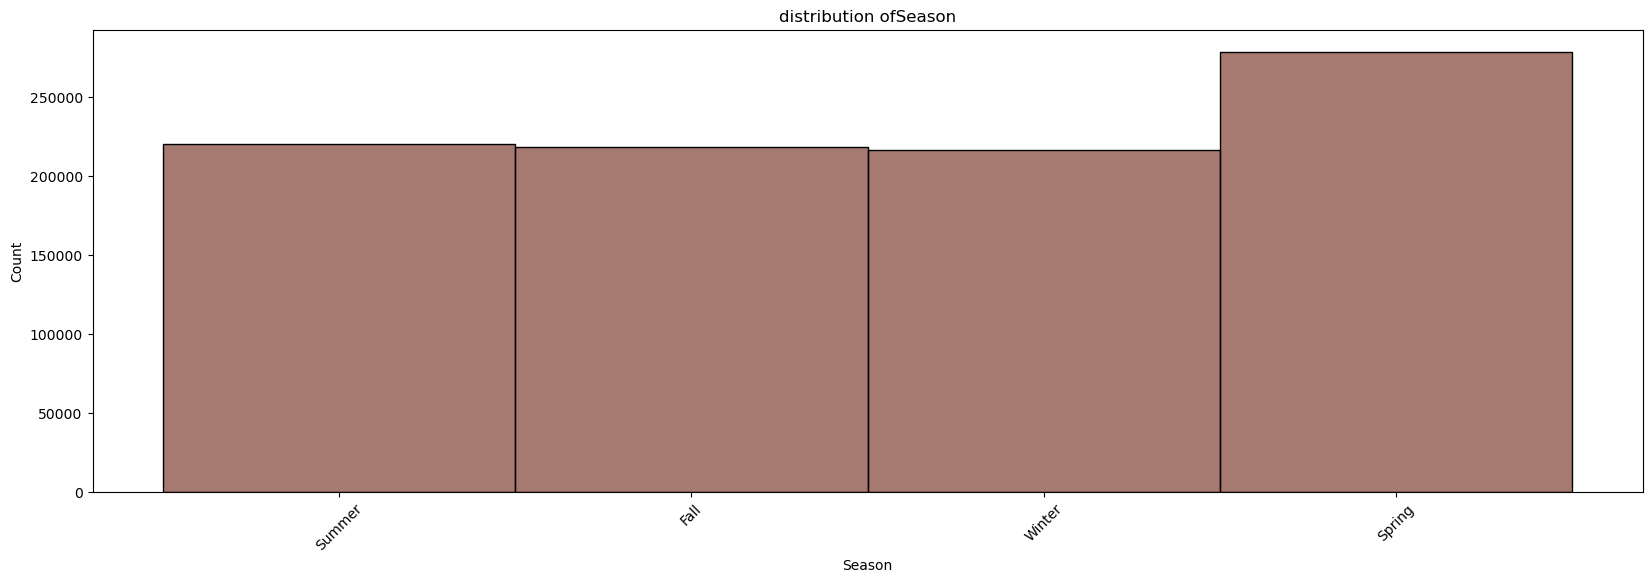

In [41]:
for i in df.select_dtypes('object'):
    plt.figure(figsize=(20,6))
    sns.histplot(x=df[i],data=df,color='#884c42',bins=40)
    plt.xticks(rotation=45)
    plt.title(f"distribution of{i}")
    plt.show()
    


### Insights:
#### For Customer gender 
##### Male customers represent the majority of purchases, indicating a stronger engagement from this demographic.
#### For Car Make 
##### Toyota emerges as the leading brand in terms of sales, reflecting strong consumer trust and popularity.
#### For Car Model 
##### The S-Class model leads in performance, suggesting a clear customer preference for premium and luxury vehicles.
#### For Sale region 
##### Idaho contributes the highest share of sales, highlighting it as a key regional market.
#### For Sale month january
##### January records the highest sales volume, possibly driven by new-year purchase trends or promotional campaigns.
#### For Day of the week monday
##### Monday shows peak sales activity, suggesting that customers are more likely to finalize purchases at the start of the week.
#### For season spring
##### Spring demonstrates the highest sales performance, aligning with seasonal consumer demand patterns.



## Relationship of The Numerical  Data 

In [42]:
df.head()

,Date,Customer Age,Customer Gender,Car Make,Car Model,Car Year,Quantity,Sale Price,Cost,Profit,Discount,Payment Method,Sales Region,Sale Year,Sale Month,Sale Quarter,Day of Week,Season
0,2022-08-24,45,Male,Ford,S-Class,2024,2,70866.60,69960.74,905.86,0.05,Cash,Alaska,2021,August,3,Wednesday,Summer
1,2024-06-11,49,Male,Toyota,Prius,2021,3,72814.56,60478.29,15660.82,0.10,Loan,Kansas,2022,June,2,Tuesday,Summer
2,2022-09-14,45,Female,Chevrolet,Silverado,2021,2,80155.68,56108.98,24046.70,0.08,Lease,Mississippi,2022,September,3,Wednesday,Fall
3,2018-11-16,47,Male,Mercedes,C-Class,2020,2,153280.16,107296.11,45984.05,0.06,Loan,Alabama,2022,November,4,Friday,Fall
4,2018-02-09,57,Male,Toyota,Camry,2022,1,32726.00,26355.91,6370.09,0.10,Loan,Texas,2019,January,1,Friday,Winter


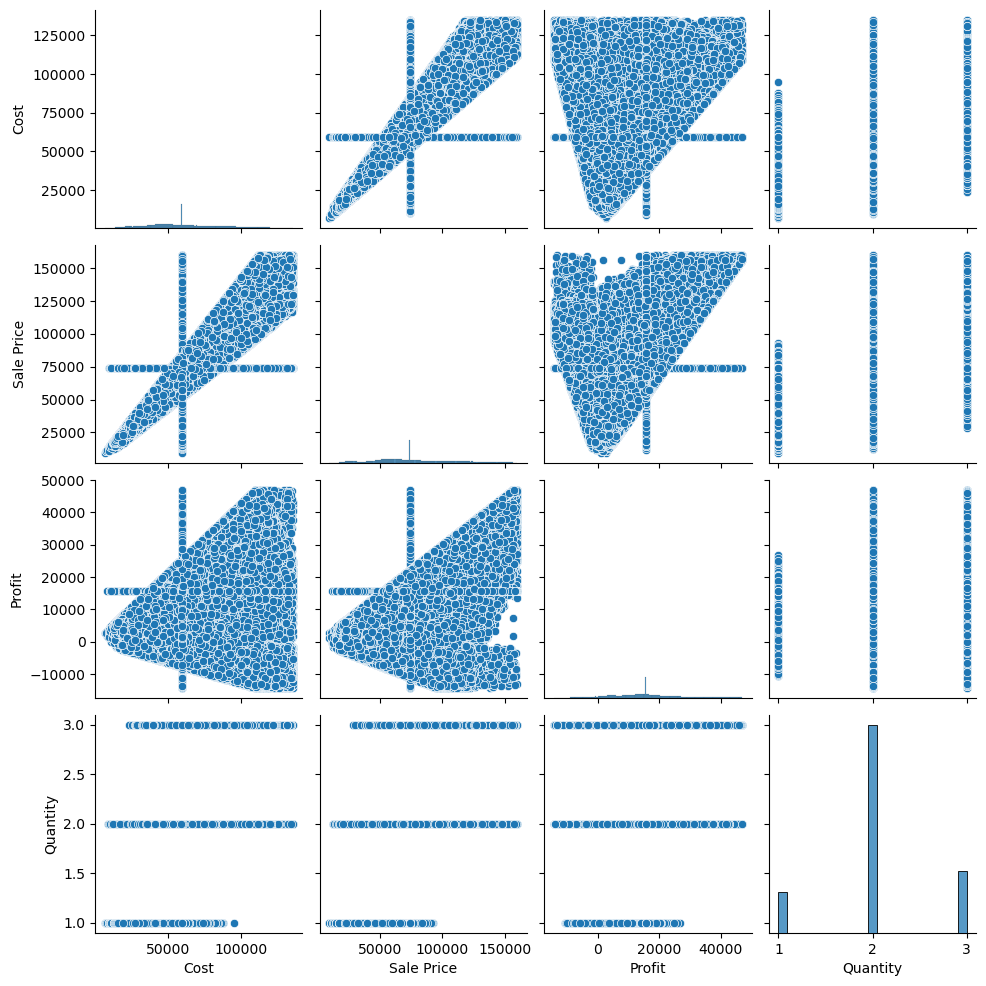

In [43]:
sns.pairplot(df[['Cost', 'Sale Price', 'Profit','Quantity']])
plt.show()

### Insights:
#### Profit ↔ Sale Price: positive relationship.
#### Profit ↔ Cost: positive relationship.
#### Discount ↔ other variables: weak / no clear trend.
#### Quantity ↔ others: limited insight since quantity is mostly fixed at small values.


### Corrleation between Features

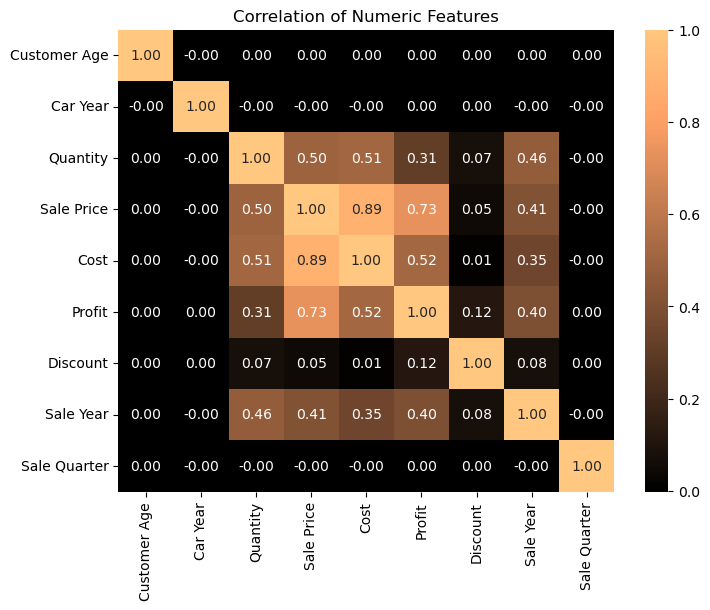

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes('number').corr(), annot=True, cmap="copper", fmt=".2f")
plt.title("Correlation of Numeric Features")
plt.show()

### Insights:
#### Profit ↔ Sale Price (>0.7 strong correlation) → Profitability is mainly driven by higher sale prices. Luxury/premium cars dominate profit margins.

#### Profit ↔ Cost (~0.4 moderate correlation) → Costs rise with profit but less strongly than sale price → 
#### margins are preserved even when costs are high.

#### Profit ↔ Quantity (~0.3 weak correlation) → Selling more units has some impact, but not nearly as important as selling at higher prices.

# Bivariate Analysis

In [45]:
df.columns

Index(['Date', 'Customer Age', 'Customer Gender', 'Car Make', 'Car Model',
       'Car Year', 'Quantity', 'Sale Price', 'Cost', 'Profit', 'Discount',
       'Payment Method', 'Sales Region', 'Sale Year', 'Sale Month',
       'Sale Quarter', 'Day of Week', 'Season'],
      dtype='object')

### 1) Profit by Customer Gender

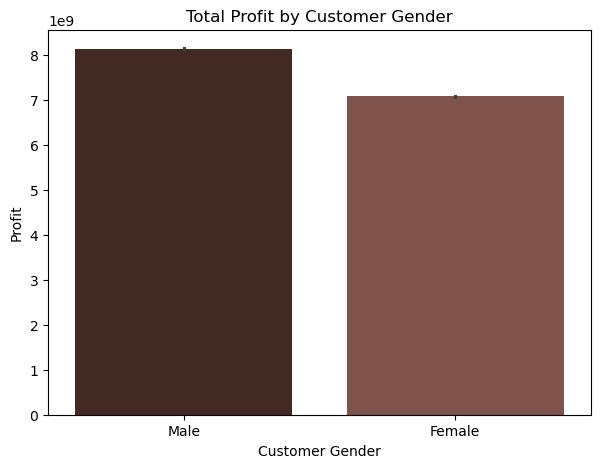

In [46]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x="Customer Gender", y="Profit", estimator=sum, palette=['#48271e','#884c42'])
plt.title("Total Profit by Customer Gender")
plt.show()

## Insights:
##### Male customers contribute slightly more total profit than female customers.
## Suggested Actions:
##### Maintain balanced marketing strategies targeting both male and female customers to avoid neglecting a profitable segment.

### 2) Customer Age vs Sale Price

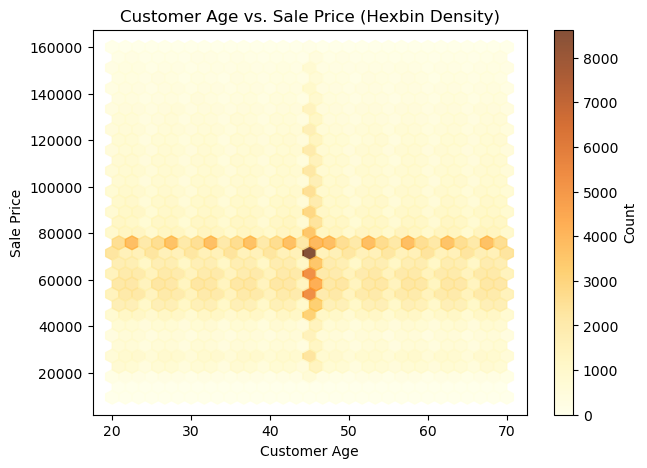

In [47]:
plt.figure(figsize=(7,5))
plt.hexbin(df["Customer Age"], df["Sale Price"], gridsize=30, cmap="YlOrBr", alpha=0.8)
plt.colorbar(label="Count")
plt.title("Customer Age vs. Sale Price (Hexbin Density)")
plt.xlabel("Customer Age")
plt.ylabel("Sale Price")
plt.show()

## Insights:
##### The highest concentration of purchases comes from customers aged 40–50, who dominate car sales in terms of spending.
## Suggested Actions:
##### Targeted marketing campaigns: Focus promotions and personalized offers on the 40–50 segment, since they are the most active buyers.
##### Expand financing options for younger buyers (20s–30s) to capture future long-term customers.

### 3) Top 10 Car Makes by Profit

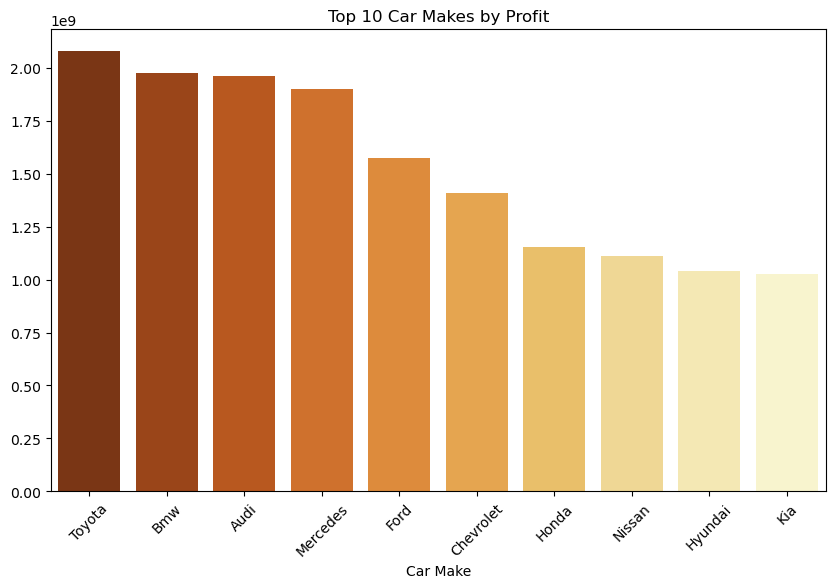

In [48]:
top_makes = df.groupby("Car Make")["Profit"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_makes.index, y=top_makes.values, palette="YlOrBr_r")
plt.title("Top 10 Car Makes by Profit")
plt.xticks(rotation=45)
plt.show()

### Insights:
##### Toyota leads in profit, followed by BMW, Audi, and Mercedes.
##### This shows that both mass-market (Toyota) and premium/luxury brands (BMW, Audi, Mercedes) contribute strongly to profitability.
## Suggested Actions:
##### Expand Toyota sales channels (e.g., dealerships, online financing options) to leverage its strong demand and volume.
##### Boost luxury car marketing for BMW, Audi, and Mercedes — emphasize premium features and financing options to attract high-income buyers.

### 4) Car Year vs Sale Price

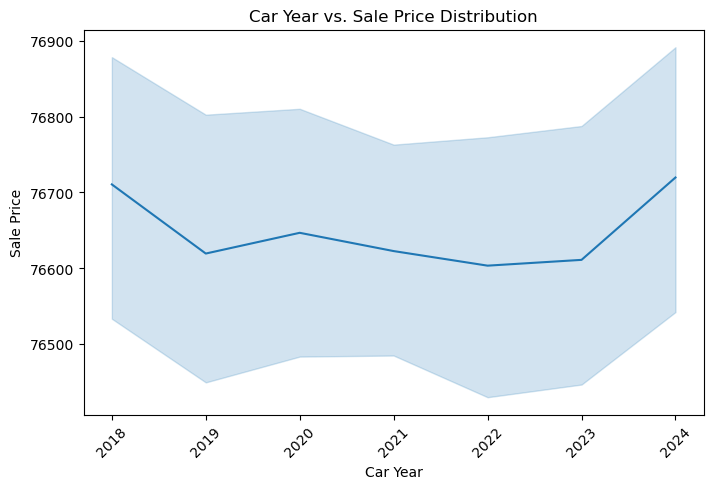

In [49]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x="Car Year", y="Sale Price", palette="YlOrBr_r")
plt.title("Car Year vs. Sale Price Distribution")
plt.xticks(rotation=45)
plt.show()

### Insights:
#### Sale prices declined sharply from 2018 to 2019, then slightly recovered in 2019–2020.
#### From 2020 to 2023, prices dropped significantly, possibly due to economic slowdown or oversupply.
#### In 2023–2024, prices rebounded, indicating renewed demand or introduction of higher-value models
## Suggested Actions:
#### Investigate the 2020–2023 dip: was it due to discounting strategies, market competition, or macroeconomic factors?
#### Strengthen premium/luxury segment promotions during high-demand periods

### 5) Profit by Payment Method

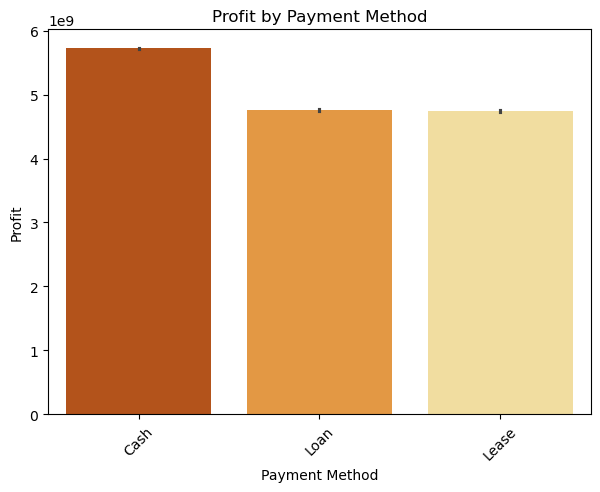

In [50]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x="Payment Method", y="Profit", estimator=sum,palette="YlOrBr_r" )
plt.title("Profit by Payment Method")
plt.xticks(rotation=45)
plt.show()

## Insight:
#### Customers paying with cash generate the highest profit contribution.
## Suggested Actions:
#### Promote cash purchase incentives (e.g., small discounts, free service packages) to encourage more cash transactions.
#### Highlight exclusive cash-only deals to attract high-value customers.

### 7) Day of Week vs. Quantity Sold

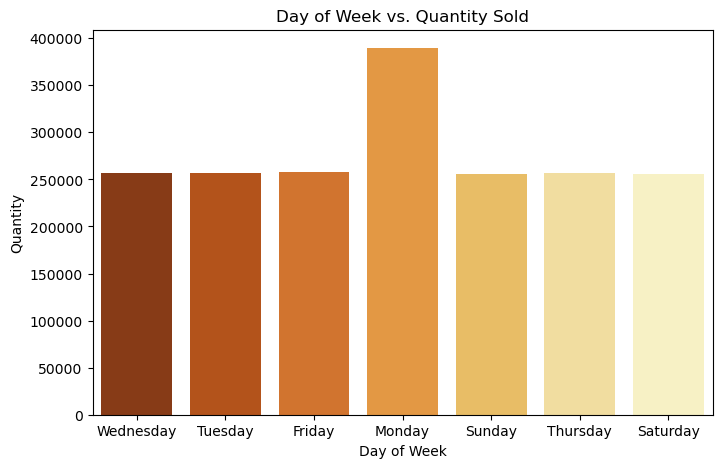

In [52]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Day of Week", y="Quantity", estimator=sum, ci=None, palette="YlOrBr_r")
plt.title("Day of Week vs. Quantity Sold")
plt.show()

### Insights:
##### Monday shows the highest quantity of cars sold, indicating the start of the week is a strong sales driver
## Suggested Actions:
##### Leverage Mondays for targeted promotions and marketing campaigns (e.g., limited-time offers to boost conversions).

### 9) Discount vs Profit

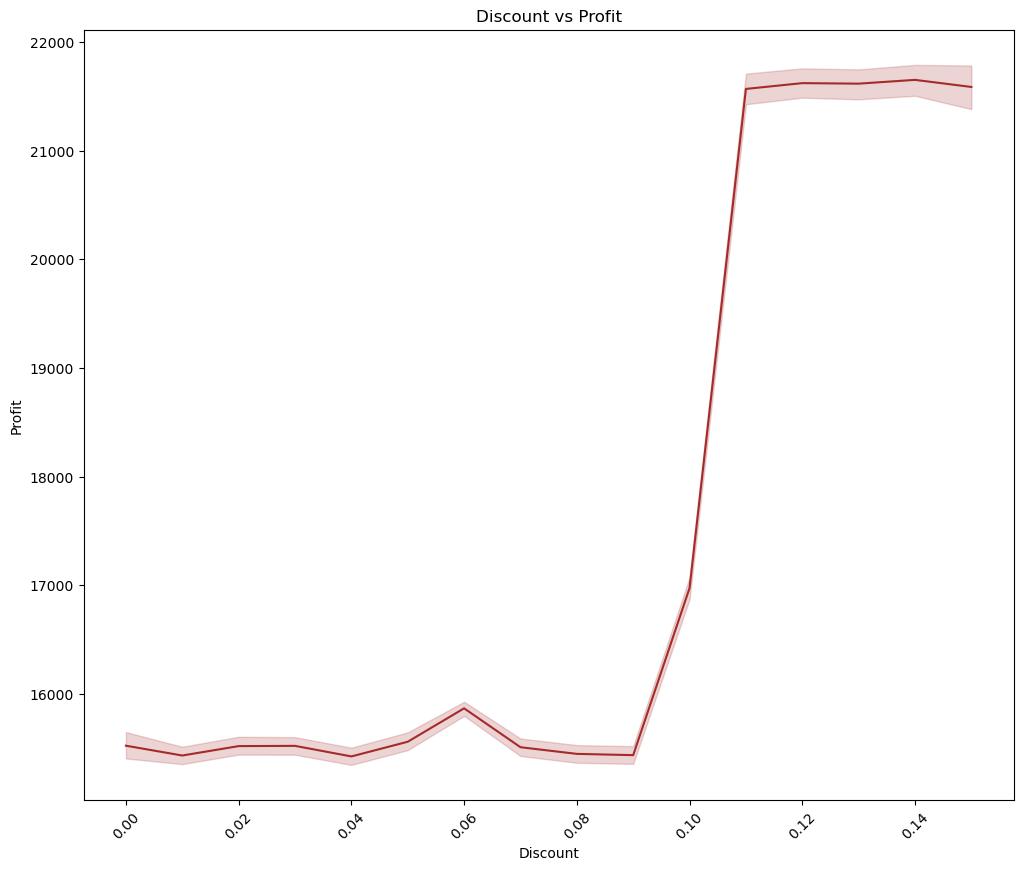

In [69]:
plt.figure(figsize=(12,10))
sns.lineplot(data=df, x="Discount", y="Profit",color='Brown')
plt.title("Discount vs Profit")
plt.xticks(rotation=45)
plt.show()

## Insights:
### Discounts below 10% don’t move the needle — customers behave almost the same.
### Discounts around 10–12% are optimal, driving higher sales volumes and lifting profit.
### Beyond that, additional discounts don’t improve profitability and may cut margins unnecessarily.

# Feature Engineering

In [55]:
# 1. Age Groups (segment customers)
df['Age Group'] = pd.cut(df['Customer Age'],
                            bins=[18, 30, 45, 60, 100],
                            labels=['18-30', '31-45', '46-60', '60+'])

In [56]:
# Create Revenue column
df['Revenue'] = df['Quantity'] * df['Sale Price']

In [57]:
# 2. Profit Margin %
df['Profit Margin %'] = (df['Profit'] / df['Sale Price']) * 10

In [58]:
# 3. Discount Level (categorical)
df['Discount Level'] = pd.cut(df['Discount'],
                                 bins=[0, 5, 15, 30, 100],
                                 labels=['Low', 'Medium', 'High', 'Very High'])

In [59]:
# 4. Luxury vs Non-Luxury Cars
df['Is Luxury'] = df['Sale Price'].apply(lambda x: 1 if x > 50000 else 0)

In [60]:
# 5. Weekend Flag
df['Is Weekend'] = df['Day of Week'].isin(['Saturday','Sunday']).astype(int)

In [87]:
# 8. YearMonth for time-series
df["YearMonth"] = df["Date"].dt.strftime("%B")


In [62]:
df.columns


Index(['Date', 'Customer Age', 'Customer Gender', 'Car Make', 'Car Model',
       'Car Year', 'Quantity', 'Sale Price', 'Cost', 'Profit', 'Discount',
       'Payment Method', 'Sales Region', 'Sale Year', 'Sale Month',
       'Sale Quarter', 'Day of Week', 'Season', 'Age Group', 'Revenue',
       'Profit Margin %', 'Discount Level', 'Is Luxury', 'Is Weekend',
       'YearMonth'],
      dtype='object')

## Exploratory Data Analysis & Time Series Analysis  (After Feature Engineering)

### Revenue Trend Over Time

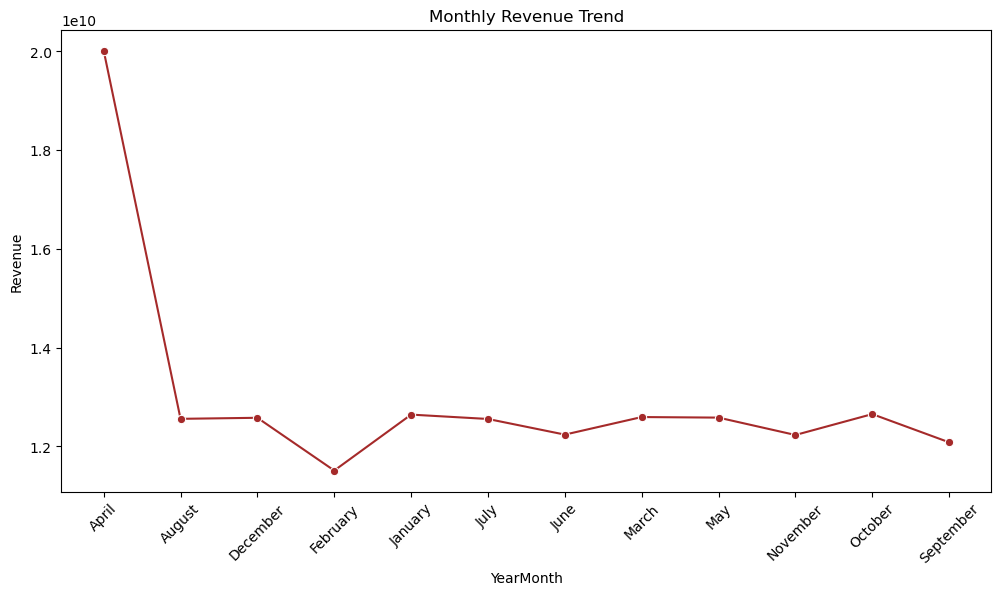

In [88]:
df_rev = df.groupby("YearMonth", as_index=False)["Revenue"].sum()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_rev, x="YearMonth", y="Revenue", marker="o", color="Brown")
plt.title("Monthly Revenue Trend")
plt.xticks(rotation=45)
plt.show()




### Insight:
##### The monthly revenue trend shows overall downward movement across the year.
#### However, there is a spike in February, indicating a short-lived seasonal or promotional effect.
### Suggested Actions:
#### Seasonality testing → Compare February patterns across multiple years to confirm if it’s a recurring seasonal demand or a one-time anomaly.

## Profit Trend Over Time

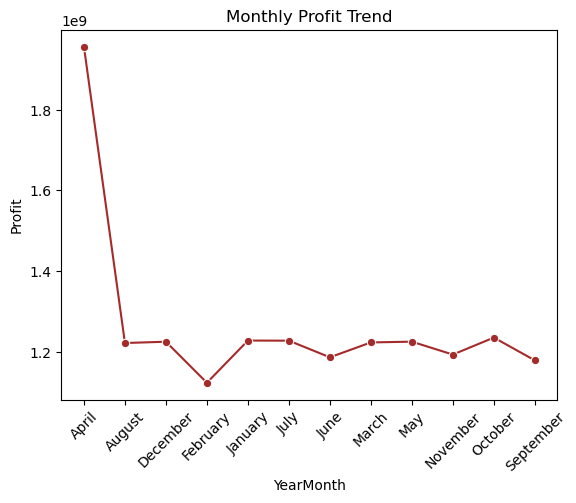

In [89]:
df_prof = df.groupby("YearMonth")["Profit"].sum().reset_index()
sns.lineplot(data=df_prof, x="YearMonth", y="Profit", marker="o", color="Brown")
plt.title("Monthly Profit Trend")
plt.xticks(rotation=45)
plt.show()


### Insights:
#### The monthly profit trend follows a similar downturn pattern as revenue.
#### February shows a strong spike in profit, meaning that not only sales volume but also profitability peaked.
### Suggested Actions:
#### Replicate February success → Identify what drove the profit spike (luxury car sales, reduced discounts, better pricing). 


## Revenue by Season

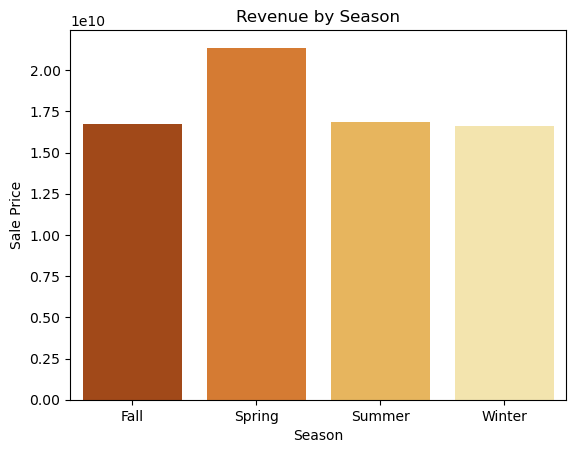

In [70]:
sns.barplot(data=df.groupby("Season")["Sale Price"].sum().reset_index(), 
            x="Season", y="Sale Price", palette="YlOrBr_r")
plt.title("Revenue by Season")
plt.show()


### Insights:
#### Spring shows the highest revenue compared to other seasons.
### Suggested Actions:
#### Seasonal promotions → Launch special financing, trade-in offers, or discounts in non-spring seasons to balance revenue.

### Profit by Season

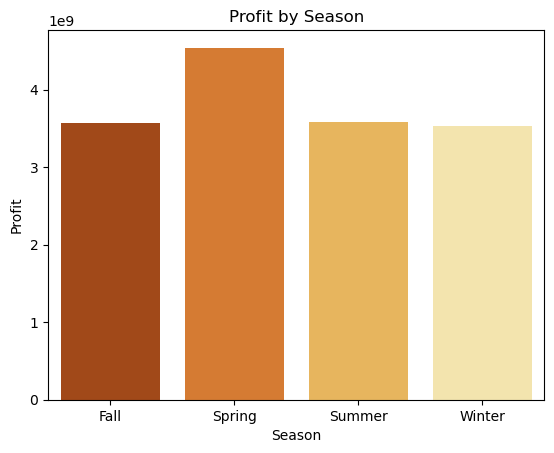

In [71]:
sns.barplot(data=df.groupby("Season")["Profit"].sum().reset_index(), 
            x="Season", y="Profit", palette="YlOrBr_r")
plt.title("Profit by Season")
plt.show()


### Insights:
#### Spring also shows the highest profit, meaning strong revenue translates into good margins.
### Suggested Actions:
#### Replicate success → Analyze what pricing, promotions, or car models drive spring profitability and extend similar tactics into weaker seasons.
#### Optimize cost structure → In non-spring months, review marketing efficiency, discounts, and logistics to improve margins.


### Revenue by Region

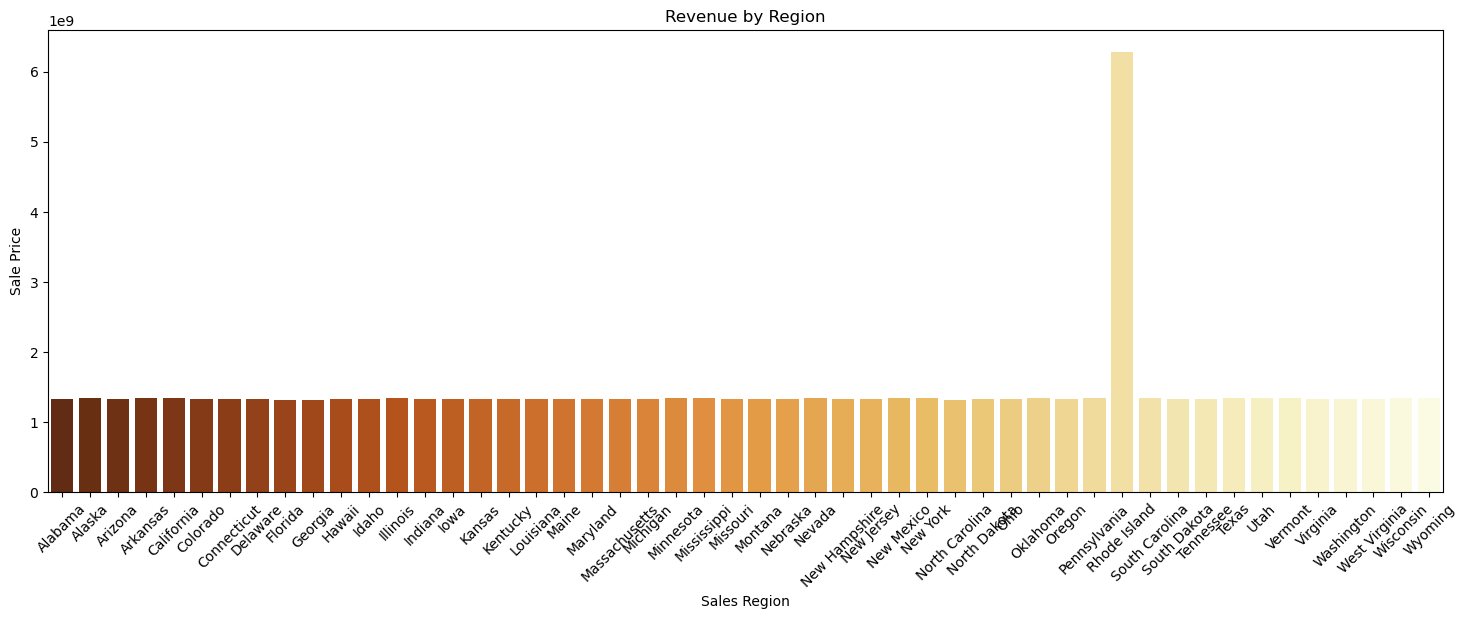

In [75]:
plt.figure(figsize=(18,6))
sns.barplot(data=df.groupby("Sales Region")["Sale Price"].sum().reset_index(), 
            x="Sales Region", y="Sale Price", palette="YlOrBr_r")

plt.title("Revenue by Region")
plt.xticks(rotation=45)
plt.show()


### Insights:
#### Pennsylvania leads in total revenue generation, outperforming other sales regions
### Suggested Actions:
#### Double down on Pennsylvania → Increase inventory allocation and dealership support to sustain and grow this strong market.

### Profit Margin % by Car Model

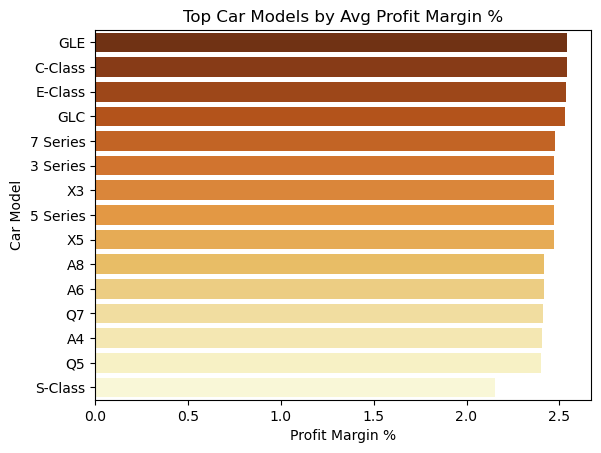

In [76]:
df_model = df.groupby("Car Model")["Profit Margin %"].mean().reset_index()
sns.barplot(data=df_model.sort_values("Profit Margin %", ascending=False).head(15), 
            x="Profit Margin %", y="Car Model", palette="YlOrBr_r")
plt.title("Top Car Models by Avg Profit Margin %")
plt.show()



### Insights :
#### Luxury models (GLE, C-Class, GLC, E-Class) dominate profit margins, showing that premium cars deliver higher profitability per unit.
### Suggested Actions:
#### Prioritize luxury car marketing → Invest more in advertising, dealership promotions, and premium experiences for these high-margin models.

### Luxury vs Non-Luxury Profit

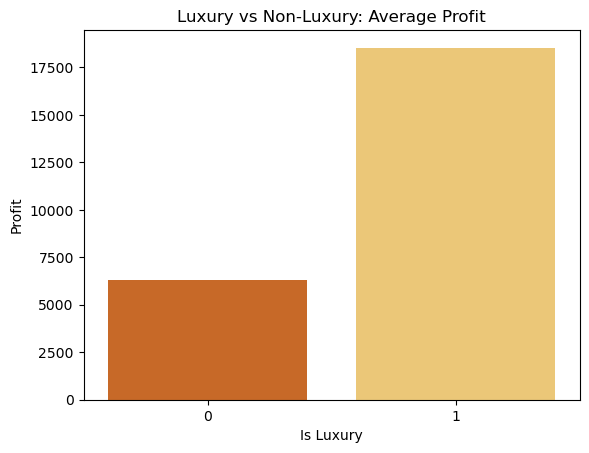

In [77]:
sns.barplot(data=df.groupby("Is Luxury")["Profit"].mean().reset_index(), 
            x="Is Luxury", y="Profit", palette="YlOrBr_r")
plt.title("Luxury vs Non-Luxury: Average Profit")
plt.show()


### Insights:
#### Luxury cars significantly outperform non-luxury cars in average profit, confirming that premium models drive the bulk of profitability.
### Suggested Actions:
#### Strengthen Luxury Portfolio → Focus inventory and promotions more on luxury brands/models, as they provide higher ROI.

## Weekend vs Weekday Revenue

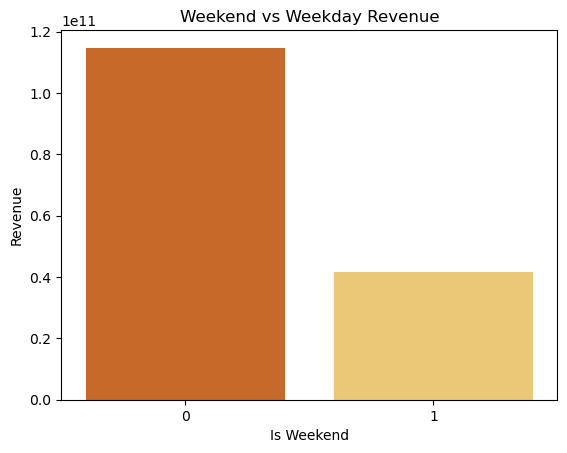

In [90]:
sns.barplot(data=df.groupby("Is Weekend")["Revenue"].sum().reset_index(), 
            x="Is Weekend", y="Revenue", palette="YlOrBr_r")
plt.title("Weekend vs Weekday Revenue")
plt.show()


### Insights:
#### Weekday sales generate higher revenue than weekends, indicating that customers are more active during working days.
### Suggested Actions:
#### Boost Weekend Promotions → Offer targeted discounts, test drive events, or financing deals to attract serious weekend buyers.

## Revenue & Profit by Car Year

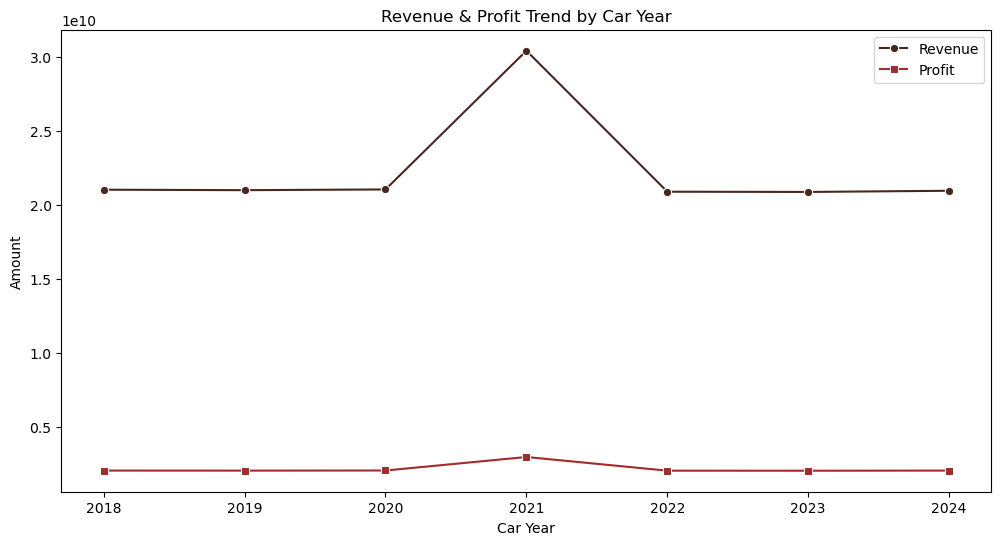

In [91]:
# Revenue & Profit by Car Year
car_year_perf = df.groupby('Car Year')[['Revenue', 'Profit']].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=car_year_perf, x='Car Year', y='Revenue', marker='o', label='Revenue',color='#48271e')
sns.lineplot(data=car_year_perf, x='Car Year', y='Profit', marker='s', label='Profit', color='Brown')
plt.title("Revenue & Profit Trend by Car Year")
plt.xlabel("Car Year")
plt.ylabel("Amount")
plt.legend()
plt.show()




### Insights:
#### Overall Downtrend → Both revenue and profit are declining across newer car years, suggesting weakening demand for recent models.
#### Slight Recovery (2020–2021) → A small bump indicates a temporary resurgence in demand (possibly tied to new model launches or market recovery post-pandemic).
### Suggested Actions:
#### Promote Older Models → Since newer models underperform, introduce trade-in offers or bundle deals to clear unsold stock.
#### Capitalize on 2020–2021 Insights → Analyze why that year performed better (e.g., incentives, popular models) and replicate those strategies.

##  Top 10 Car Models by Revenue

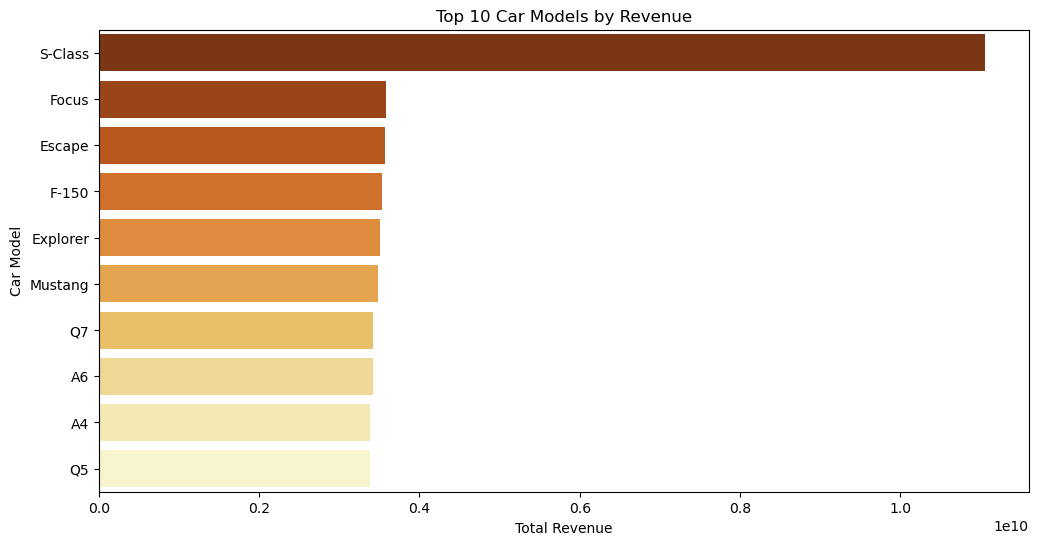

In [86]:
top_models = df.groupby('Car Model')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_models.values, y=top_models.index, palette='YlOrBr_r')
plt.title("Top 10 Car Models by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Car Model")
plt.show()

In [ ]:
## Insight:
#### 
## Suggested Action:


# Feature Scaling And Encoding